In [69]:
# imports
from scraper import stock_daily
import indicators as ind
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

***
# **Analyze Trade**
This notebook automatically creates charts for posttrade analysis. Charts at entry, exit and chart how does the trade looks on overall chart. Analysis should be done 2 months after the trade

In [70]:
# settings
ticker = "MSFT"
# buy
buydate = dt.datetime(year= 2021, month= 8, day= 9)
buyprice = 0
# sell
selldate = dt.datetime(year= 2021, month= 10, day= 8)
sellprice = 0


In [71]:
enddate = dt.datetime.today() if (dt.datetime.today() < (selldate + dt.timedelta(days=60))) else selldate + dt.timedelta(days=60)
delta = enddate - (buydate - dt.timedelta(days=90))

stock = stock_daily(ticker, save=False, edate=enddate, delta=delta)



In [72]:
stock.data.loc[0,"Date"].strftime("%d/%m")

'10/05'

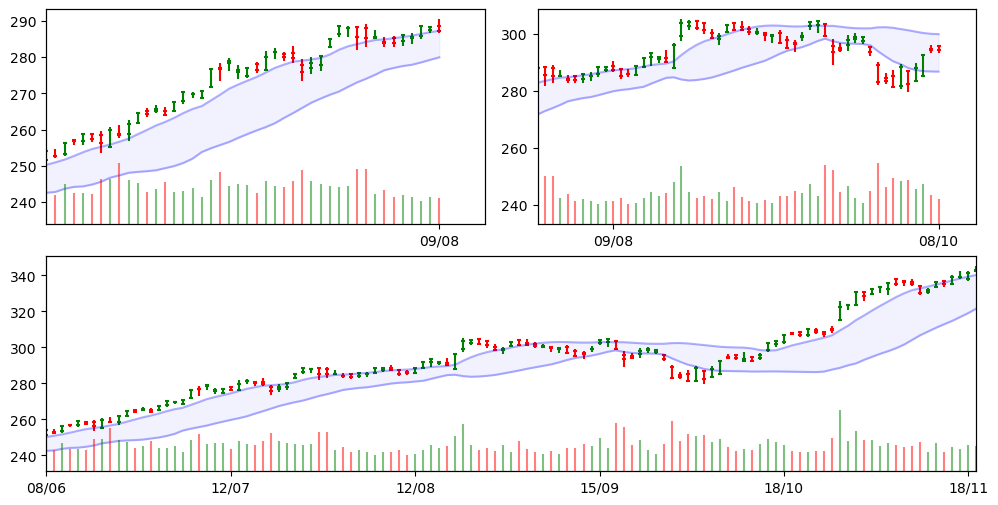

In [73]:
# enddate 2 months after sell or today if less
# output figure with 3 panels, 2 on top (chart buy, chart sell and 1 longer how to the trade looks in overall chart)
bp = np.where(stock.data["Date"] == buydate)[0][0]
sp = np.where(stock.data["Date"] == selldate)[0][0]

# define axis
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(nrows=2, ncols=2, hspace=0.15, wspace=0.12)

# buy chart
ax1 = fig.add_subplot(gs[0, 0])
ax1, ax1b = ind.plot_candlestick(ax1, ax1.twinx(), stock.data.loc[:bp, :])
ax1 = ind.plot_bollinger(ax1, stock.data.loc[:bp, :])
ax1.set_xlim([20, bp+5])
ax1.set_xticks([bp])
ax1.set_xticklabels([stock.data.loc[bp,"Date"].strftime("%d/%m")])

# sell chart
ax2 = fig.add_subplot(gs[0, 1])
ax2, ax2b = ind.plot_candlestick(ax2, ax2.twinx(), stock.data.loc[:sp, :])
ax2= ind.plot_bollinger(ax2, stock.data.loc[:sp, :])
ax2.set_xlim([bp-10, sp+5])
ax2.set_xticks([bp, sp])
ax2.set_xticklabels(stock.data.loc[[bp, sp],"Date"].dt.strftime("%d/%m"))

# overall chart
ax3 = fig.add_subplot(gs[1, :])
ax3, ax3b = ind.plot_candlestick(ax3, ax3.twinx(), stock.data)
ax3 = ind.plot_bollinger(ax3, stock.data)
ax3.set_xlim([20, stock.data.index[-1]])
tick = np.linspace(stock.data.index[20], stock.data.index[-1]-1, 6, dtype=int)
ax3.set_xticks(tick)
ax3.set_xticklabels(stock.data.loc[tick,"Date"].dt.strftime("%d/%m"))

plt.show()
